# Cyber Security Case Study

## Binomial Classification

#### Normal Vs Intrusion

#### Importing the Packages

In [1]:
import pandas as pd
pd.set_option("display.max_columns",999)


import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

import os 

import warnings
warnings.filterwarnings('ignore')

import statistics as sts




### Reading the Data and Merging 

In [2]:
BufferOverFlow = pd.read_csv("Datasets\\Data_of_Attack_Back_BufferOverflow.csv")

In [3]:
FTPWrite = pd.read_csv("Datasets\\Data_of_Attack_Back_FTPWrite.csv",header=None)
FTPWrite.columns = BufferOverFlow.columns
BufferOverFlow["Type"] = "BufferOverflow"
FTPWrite["Type"]="FTPWrite"

In [4]:
BufferOverFlow.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.0184,0,0.05,0.0,0.01511,0.02957,0,0,0,0.3,0,0.1,0.2,0.1,0,0.0,0.1,0,0,0,0,0,0.001,0.001,0.0,0,0.0,0.0,0.1,0.0,0,0.001,0.003,0.1,0,0.10,0.067,0,0,0.0,0.0,BufferOverflow
1,0.0305,0,0.05,0.0,0.01735,0.02766,0,0,0,0.3,0,0.1,0.2,0.1,0,0.0,0.1,0,0,0,0,0,0.001,0.001,0.0,0,0.0,0.0,0.1,0.0,0,0.002,0.004,0.1,0,0.05,0.050,0,0,0.0,0.0,BufferOverflow


In [8]:
FTPWrite.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.0026,0,0.07,0,0.00116,0.00451,0,0,0.0,0.2,0,0.1,0.0,0,0,0.0,0.1,0,0.1,0,0,0.1,0.001,0.001,0,0,0,0,0.1,0,0.0,0.001,0.001,0.10,0.0,0.10,0.0,0,0,0,0,FTPWrite
1,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,0,0.1,0.1,0,0,0.1,0.0,0,0.1,0,0,0.0,0.001,0.001,0,0,0,0,0.1,0,0.0,0.002,0.001,0.05,0.1,0.05,0.0,0,0,0,0,FTPWrite


In [13]:
GuessPassword = pd.read_csv("Datasets\\Data_of_Attack_Back_GuessPassword.csv")
#FTPWrite.columns = BufferOverFlow.columns
GuessPassword["Type"]="GuessPassword"

In [14]:
GuessPassword.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.0023,0,0.05,0.00,0.00104,0.00276,0,0,0,0.0,0.5,0.0,0,0,0,0,0,0,0,0,0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0,0,0.001,0.002,0.1,0,0.1,0.1,0.0,0.0,0.0,0.0,GuessPassword
1,0.0060,0,0.05,0.03,0.00125,0.00179,0,0,0,0.1,0.1,0.0,0,0,0,0,0,0,0,0,0,0.0,0.001,0.001,0.1,0.1,0.0,0.0,0.1,0,0,0.001,0.001,0.1,0,0.1,0.0,0.1,0.1,0.0,0.0,GuessPassword


In [15]:
Neptune= pd.read_csv("Datasets\\Data_of_Attack_Back_Neptune.csv")

Neptune["Type"]="Neptune"

In [16]:
Neptune.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.002,0.001,0.050,0.1,0.0,0.0,0.050,0.100,0.0,0.001,0.002,0.1,0.0,0.10,0.100,0.1,0.050,0.0,0.0,Neptune
1,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.003,0.002,0.067,0.1,0.0,0.0,0.067,0.067,0.0,0.002,0.003,0.1,0.0,0.05,0.067,0.1,0.067,0.0,0.0,Neptune


In [17]:
NMap= pd.read_csv("Datasets\\Data_of_Attack_Back_NMap.csv")

NMap["Type"]="NMap"

In [18]:
NMap.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.0,0.0,0,0,0.1,0.0,0.0,0.003,0.001,0.033,0.100,0.033,0.0,0.0,0.0,0,0,NMap
1,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.0,0.0,0,0,0.1,0.0,0.0,0.004,0.002,0.050,0.075,0.050,0.0,0.0,0.0,0,0,NMap


In [19]:
Normal = pd.read_csv("Datasets\\Data_of_Attack_Back_Normal.csv")
Normal["Type"]="Normal"

Normal.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,Normal


In [20]:
PortSweep = pd.read_csv("Datasets\\Data_of_Attack_Back_PortSweep.csv")

PortSweep["Type"]="PortSweep"
PortSweep.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.0000,0.0,0.14,0.05,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.171,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.029,0.002,PortSweep
1,0.0001,0.0,0.14,0.08,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.002,0.002,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.172,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.030,0.003,PortSweep


In [21]:
RootKit = pd.read_csv('Datasets\Data_of_Attack_Back_RootKit.csv')
RootKit['Type'] = "RootKit"

RootKit.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.006,0.0,0.05,0,0.00086,0.00183,0,0,0.0,0.0,0.1,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.001,0.001,0,0,0,0,0.1,0,0,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0,RootKit
1,0.006,0.0,0.05,0,0.00090,0.00233,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.001,0.001,0,0,0,0,0.1,0,0,0.255,0.002,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0,RootKit


In [22]:
Satan= pd.read_csv('Datasets\Data_of_Attack_Back_Satan.csv')
Satan['Type'] ="Satan"

Satan.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.0,0.02,0.06,0.0,0.0002,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.143,0.001,0.001,0.004,0.001,0.0,0.001,0.0,0.0,0.0,Satan
1,0.0,0.02,0.06,0.0,0.0002,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.144,0.002,0.001,0.004,0.002,0.0,0.001,0.0,0.0,0.0,Satan


In [23]:
Smurf= pd.read_csv('Datasets\Data_of_Attack_Back_Smurf.csv')
Smurf['Type'] ="Smurf"

Smurf.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0,0,0,0,0.1,0,0,0.146,0.001,0.001,0.002,0.001,0,0.0,0,0.0,0,Smurf
1,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.315,0.315,0,0,0,0,0.1,0,0,0.147,0.002,0.001,0.002,0.001,0,0.0,0,0.0,0,Smurf


In [36]:
Back= pd.read_csv('Datasets\Data_of_Attack_Back.csv')
Back['Type'] ="Back"

Back.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.001,0.002,0.0,0.0,0.0,0.050,0.1,0.0,0.100,0.001,0.001,0.1,0,0.10,0,0.0,0.0,0.0,0.0,Back
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.002,0.003,0.0,0.0,0.0,0.033,0.1,0.0,0.067,0.002,0.002,0.1,0,0.05,0,0.0,0.0,0.0,0.0,Back


### Concating all subsets to create one full 360 DataFrame

In [41]:
df = pd.concat([BufferOverFlow,FTPWrite,GuessPassword,Neptune,NMap,Normal,PortSweep,RootKit,Satan,Smurf,Back],axis=0)

In [43]:
df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,0.0,0.1,0.2,0.1,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.003,0.1,0.0,0.10,0.067,0.0,0.0,0.0,0.0,BufferOverflow
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,0.0,0.1,0.2,0.1,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.004,0.1,0.0,0.05,0.050,0.0,0.0,0.0,0.0,BufferOverflow


In [ ]:
### Manipulating the variable names
df.columns = [ i.strip() for i in df.columns ]

In [40]:
df.shape

(817551, 42)

## Data Cleaning 

#### Percentage distibution of different Attacks 

In [52]:
a = ((df.Type.value_counts()/df.shape[0] )*100).reset_index()
a.columns=['Attack_Type','Percentage']

In [53]:
a

,Attack_Type,Percentage
0,Normal,70.541165
1,Neptune,27.793740
2,Satan,0.613907
3,Smurf,0.367806
4,PortSweep,0.362546
5,NMap,0.190080
6,Back,0.118402
7,GuessPassword,0.006483
8,BufferOverflow,0.003669
9,RootKit,0.001223


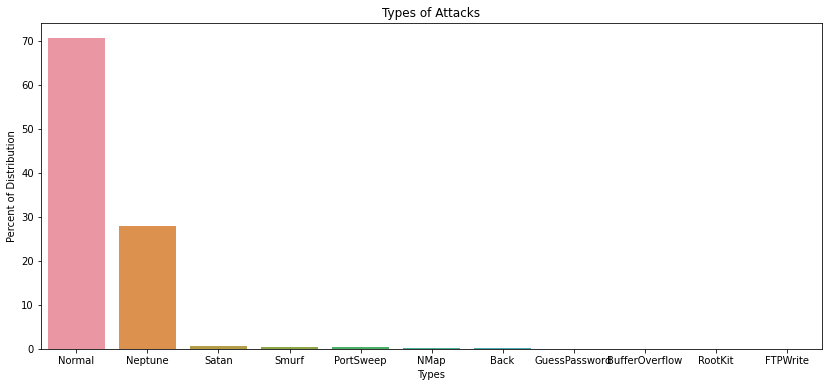

In [54]:
plt.figure(figsize=(14,6))
sns.barplot(x=a['Attack_Type'],y=a["Percentage"])
plt.title("Types of Attacks")
plt.xlabel("Types")
plt.ylabel("Percent of Distribution")
plt.show()

The data is imbalanced. We can see Normal Attacks more compared to other attacksm

In [56]:
df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,0.0,0.1,0.2,0.1,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.003,0.1,0.0,0.10,0.067,0.0,0.0,0.0,0.0,BufferOverflow
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,0.0,0.1,0.2,0.1,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.004,0.1,0.0,0.05,0.050,0.0,0.0,0.0,0.0,BufferOverflow


#### Summary Statistics

In [34]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.0,8.175510e+05,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.0,8.175510e+05,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000
mean,0.000877,0.000570,0.052909,0.020160,0.004961,0.024862,0.0,3.669496e-07,0.000003,0.002456,0.000016,0.063812,0.000275,0.000031,0.000011,0.001463,0.000284,0.000020,0.000360,0.0,1.223165e-07,0.000277,0.059857,0.014078,0.024833,0.024929,0.005355,0.005313,0.073471,0.002939,0.010064,0.166868,0.161651,0.066795,0.003380,0.006148,0.001683,0.024865,0.024852,0.005372,0.005279
std,0.026636,0.002596,0.096389,0.030959,0.033235,0.066635,0.0,3.317904e-04,0.000805,0.041470,0.001618,0.048054,0.010338,0.001752,0.001412,0.031777,0.011742,0.001412,0.006566,0.0,1.105968e-04,0.005256,0.091984,0.031403,0.043074,0.043153,0.022330,0.022215,0.041806,0.010127,0.023558,0.102058,0.111642,0.043421,0.008557,0.017460,0.003708,0.043062,0.043151,0.021920,0.022070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.003000,0.003000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,0.000000,0.054000,0.017000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.002170,0.003670,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.011000,0.008000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.120000,0.070000,0.002990,0.019690,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.106000,0.016000,0.015000,0.017000,0.000000,0.000000,0.100000,0.005000,0.008000,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.014000,0.003000,0.000000,0.000000
max,1.000000,0.020000,0.670000,0.100000,1.000000,1.000000,0.0,3.000000e-01,0.500000,1.000000,0.500000,0.100000,1.000000,0.100000,0.200000,1.000000,1.000000,0.200000,0.900000,0.0,1.000000e-01,0.100000,0.511000,0.511000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [59]:
# Removing the above 2 redudant variables
df.drop(columns=['land','num_outbound_cmds'],inplace=True)

<font color ='Orange'>Observation</font>: 
* Land and num_outbound_cmds are redundant columns so removing.
* Looks like Data is scaled.


In [68]:
df.shape

(817551, 40)

In [71]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,8.175510e+05,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,8.175510e+05,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000
mean,0.000877,0.000570,0.052909,0.020160,0.004961,0.024862,3.669496e-07,0.000003,0.002456,0.000016,0.063812,0.000275,0.000031,0.000011,0.001463,0.000284,0.000020,0.000360,1.223165e-07,0.000277,0.059857,0.014078,0.024833,0.024929,0.005355,0.005313,0.073471,0.002939,0.010064,0.166868,0.161651,0.066795,0.003380,0.006148,0.001683,0.024865,0.024852,0.005372,0.005279
std,0.026636,0.002596,0.096389,0.030959,0.033235,0.066635,3.317904e-04,0.000805,0.041470,0.001618,0.048054,0.010338,0.001752,0.001412,0.031777,0.011742,0.001412,0.006566,1.105968e-04,0.005256,0.091984,0.031403,0.043074,0.043153,0.022330,0.022215,0.041806,0.010127,0.023558,0.102058,0.111642,0.043421,0.008557,0.017460,0.003708,0.043062,0.043151,0.021920,0.022070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.003000,0.003000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,0.000000,0.054000,0.017000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.002170,0.003670,0.000000e+00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.011000,0.008000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.120000,0.070000,0.002990,0.019690,0.000000e+00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.106000,0.016000,0.015000,0.017000,0.000000,0.000000,0.100000,0.005000,0.008000,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.014000,0.003000,0.000000,0.000000
max,1.000000,0.020000,0.670000,0.100000,1.000000,1.000000,3.000000e-01,0.500000,1.000000,0.500000,0.100000,1.000000,0.100000,0.200000,1.000000,1.000000,0.200000,0.900000,1.000000e-01,0.100000,0.511000,0.511000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


## Missing Values 

In [72]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

* No missing Values found

# Univariate Analysis

In [73]:
numerical = df.drop(columns='Type')

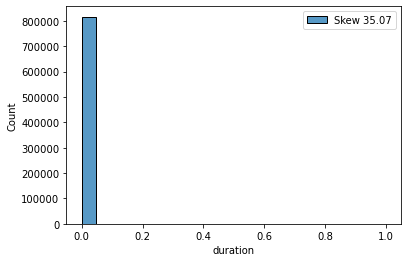

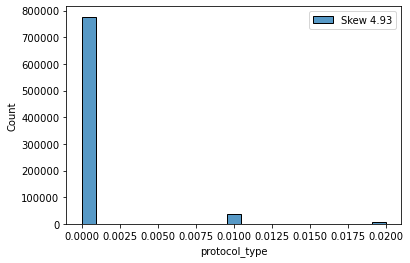

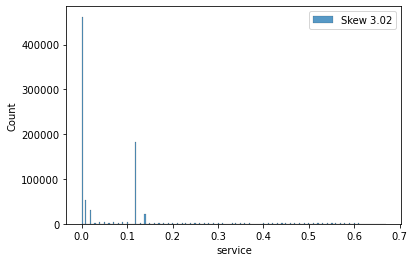

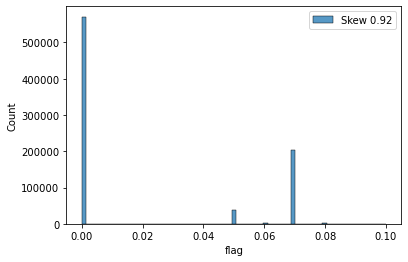

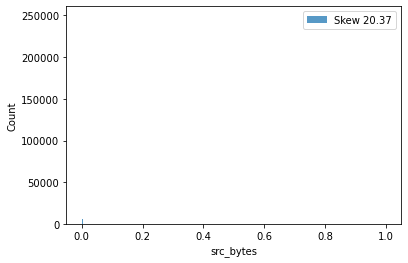

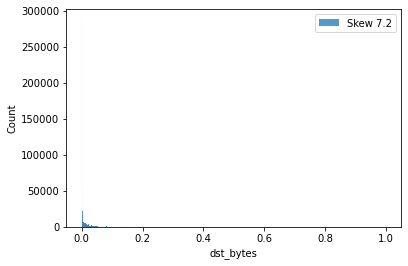

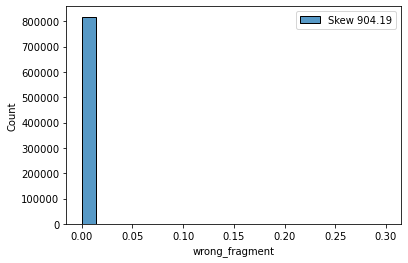

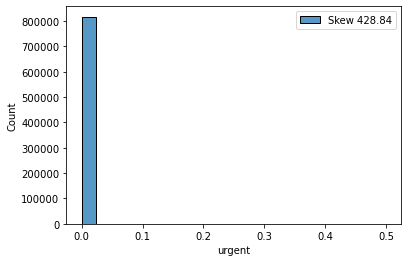

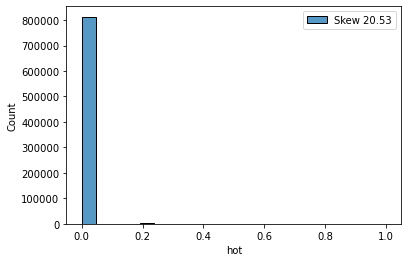

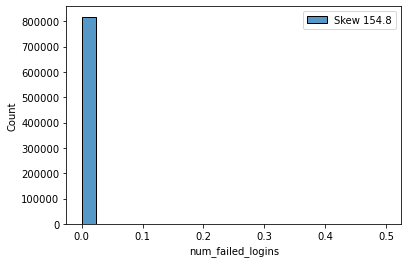

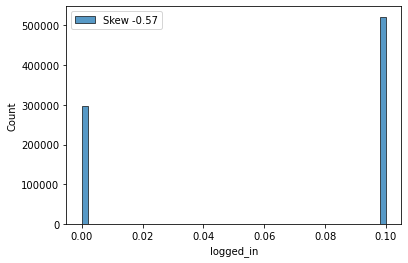

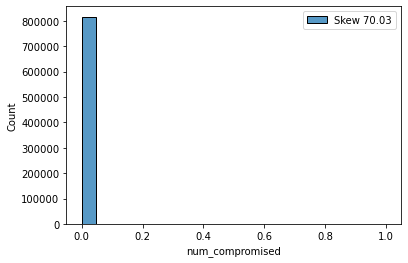

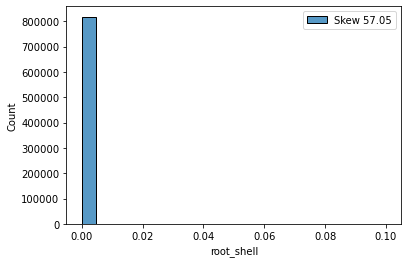

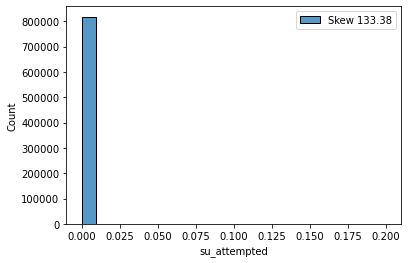

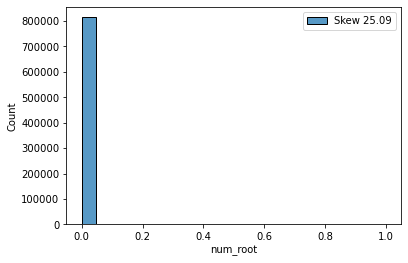

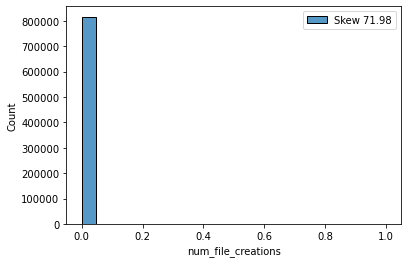

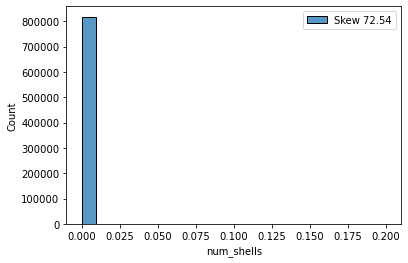

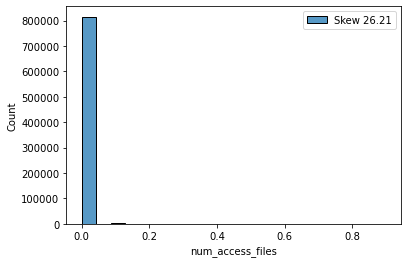

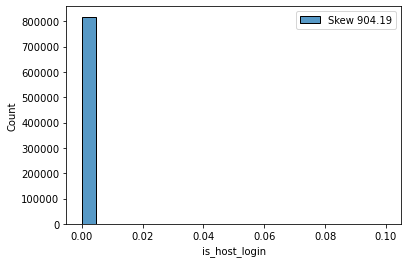

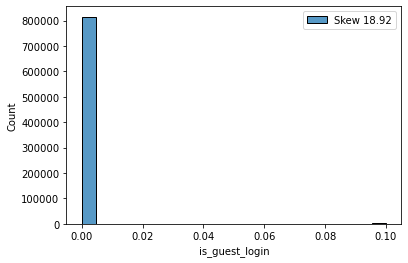

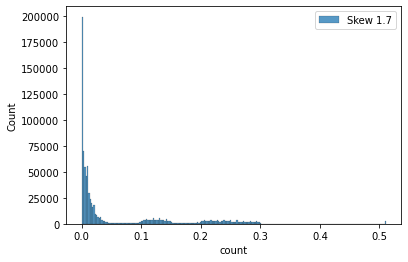

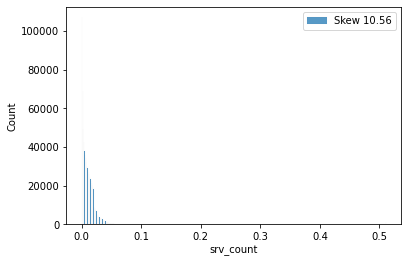

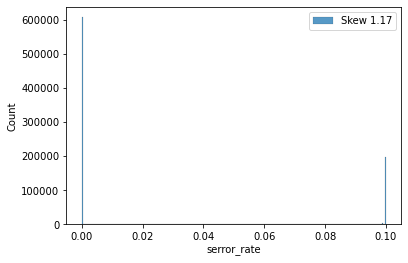

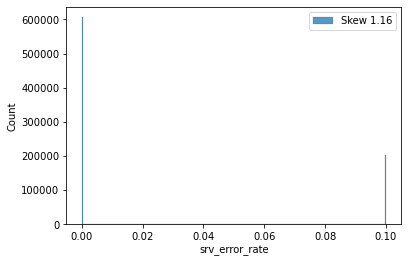

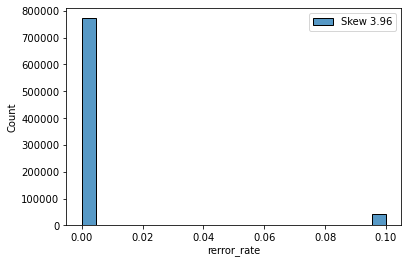

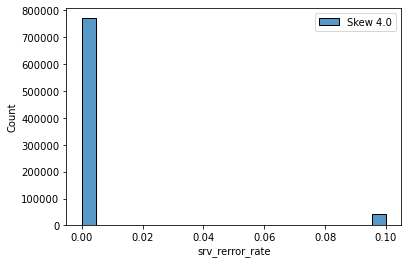

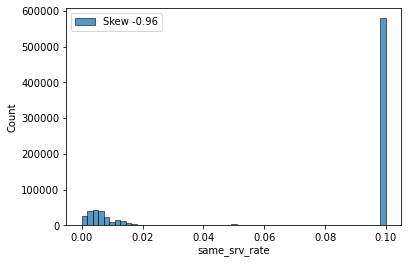

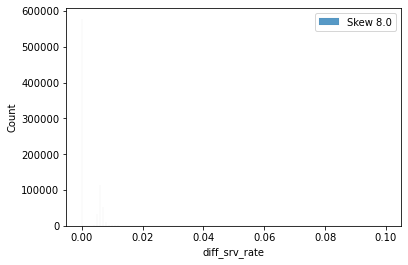

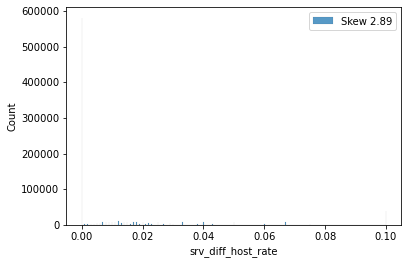

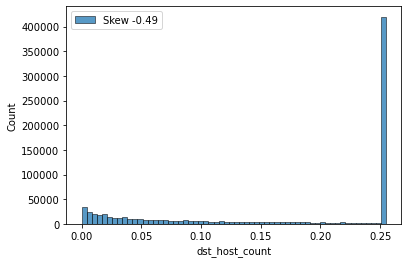

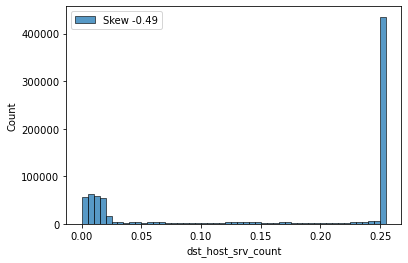

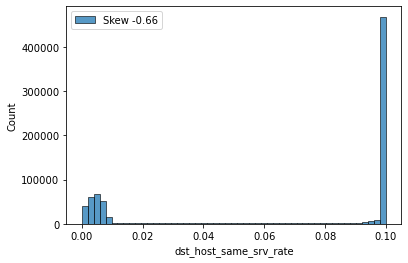

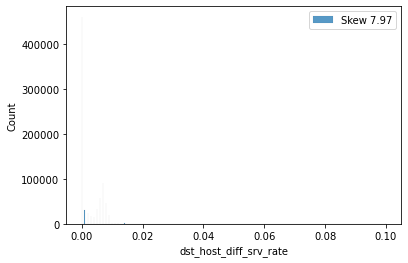

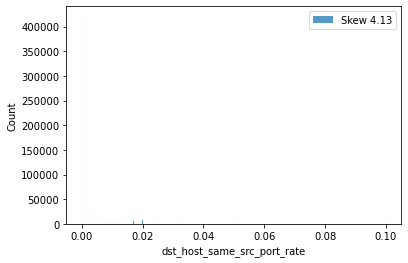

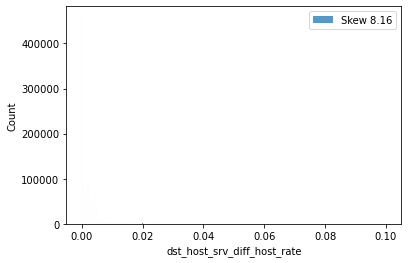

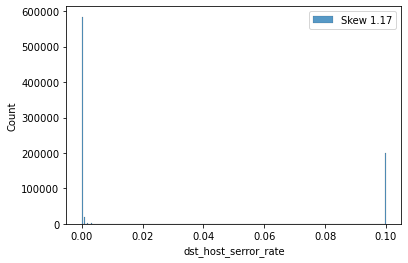

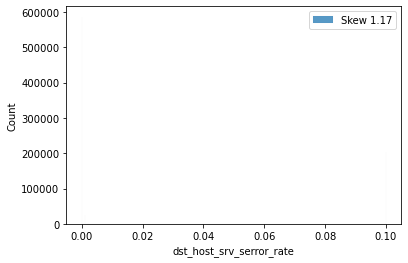

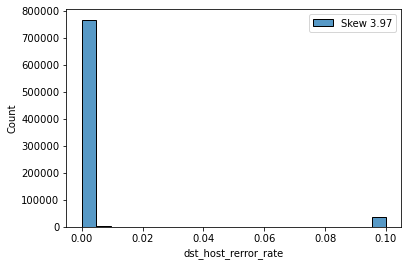

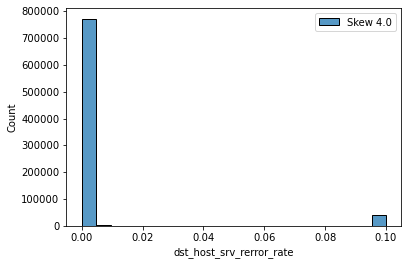

In [74]:
#plt.figure(figsize=(30,70))
for i,j in enumerate(numerical):
    sns.histplot(numerical[j], label="Skew " + str(np.round(df[j].skew(),2)))
    plt.legend()
    plt.show()

# Target Encoding

In [75]:
df["Activity"] = np.where(df['Type']=='Normal', 1, 0)


1 -> Normal
0 -> Anamoly 

In [37]:
#df.to_csv("Merged_Attack.csv")

In [76]:
(df.Activity.value_counts()/df.shape[0])*100

1    70.541165
0    29.458835
Name: Activity, dtype: float64

 *Normal is the majority class here and Anomaly activity is the minority class. The dataset is clearly imbalanced

Using SMOTE to handle Imbalanced Data 

In [84]:
X = df.drop(columns=['Type','Activity'])
Y = df['Activity']

In [85]:
print(X.shape)
print(Y.shape) 

(817551, 39)
(817551,)


### Splitting the DataSet

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [88]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(654040, 39)
(163511, 39)
(654040,)
(163511,)


In [94]:
from collections import Counter

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

In [93]:
X_train_sm, Y_train_sm = sm.fit_resample(x_train.astype("float"),y_train)

In [102]:
print("Before SMOTE:  {}".format(Counter(y_train)))

Before SMOTE:  Counter({1: 461129, 0: 192911})


In [101]:
print("After SMOTE: {}" .format(Counter(Y_train_sm)))

After SMOTE: Counter({0: 461129, 1: 461129})


# Feature Selection using Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train_sm,Y_train_sm)

score = np.round(rfc.feature_importances_,3)

importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')


In [104]:
importances =importances.reset_index()


In [105]:
importances

,feature,importance
0,same_srv_rate,0.191
1,diff_srv_rate,0.105
2,flag,0.098
3,src_bytes,0.096
4,dst_host_srv_count,0.096
5,dst_host_same_srv_rate,0.084
6,dst_bytes,0.057
7,service,0.052
8,srv_error_rate,0.052
9,count,0.034


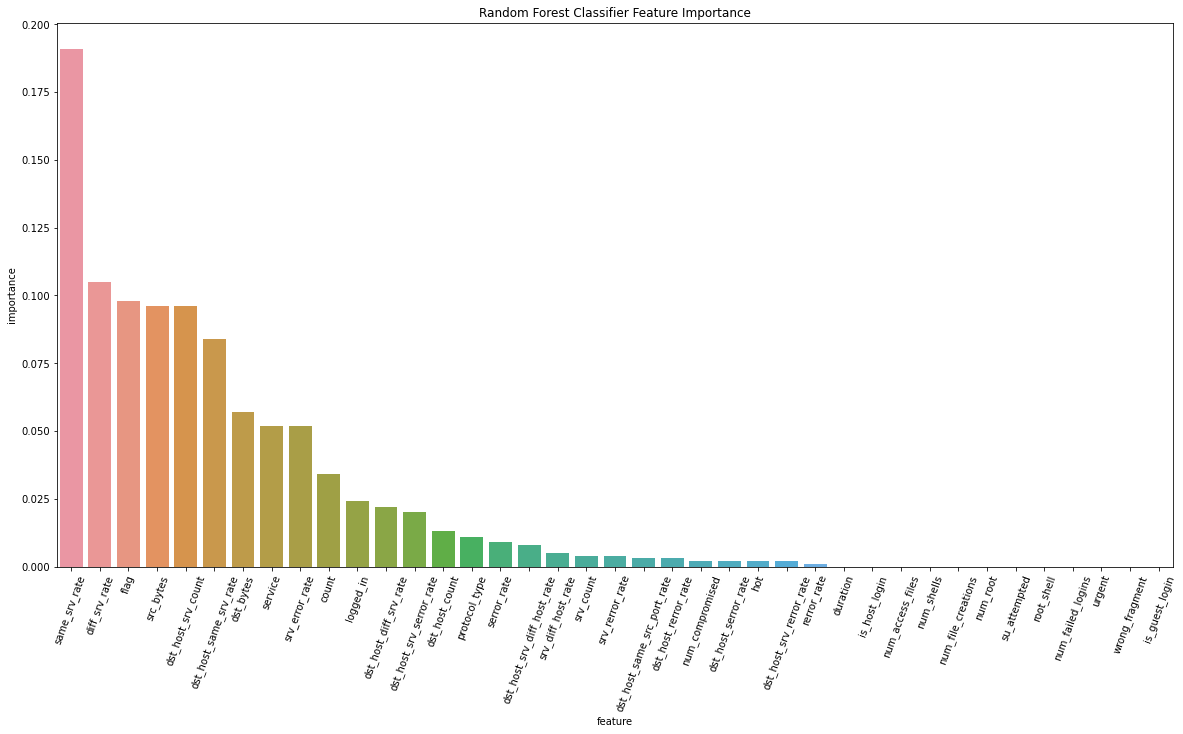

In [106]:
plt.figure(figsize=(20,10))
sns.barplot(data=importances,x=importances["feature"],y=importances['importance'])
plt.title("Random Forest Classifier Feature Importance")
plt.xticks(rotation=70)
plt.show()

In [122]:
rf_features =importances['feature'][:10].tolist()

In [ ]:
## DOnt run Taking lot of time
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
#rfe = rfe.fit(x_train, y_train)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]


In [ ]:
selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate']

# Baseline Modelling

In [130]:
rf_features

['same_srv_rate',
 'diff_srv_rate',
 'flag',
 'src_bytes',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_bytes',
 'service',
 'srv_error_rate',
 'count']

In [123]:
x_trainf= X_train_sm[rf_features]
x_testf = x_test[rf_features]   

In [124]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import  XGBClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(x_trainf, Y_train_sm)

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(x_trainf, Y_train_sm)

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(x_trainf, Y_train_sm)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(x_trainf, Y_train_sm)

RFE_Classifier = RandomForestClassifier(criterion='entropy', random_state=0)
RFE_Classifier.fit(x_trainf,Y_train_sm)

XGB_Classifier = XGBClassifier(n_jobs=-1, random_state=0)
XGB_Classifier.fit(x_trainf, Y_train_sm)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

###  Model Evaluation

In [126]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('RandomForestClassifier', RFE_Classifier))
models.append(('XGBClassifier', XGB_Classifier))
    
for i, v in models:
    scores = cross_val_score(v, x_testf, y_test, cv=10)
    accuracy = metrics.accuracy_score(y_test, v.predict(x_testf))
    confusion_matrix = pd.crosstab(y_test, v.predict(x_testf))
    classification = metrics.classification_report(y_test, v.predict(x_testf))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9904348963797016

Model Accuracy:
 0.9759159934194029

Confusion matrix:
 col_0         0       1
Activity               
0         46466    1464
1          2474  113107

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     47930
           1       0.99      0.98      0.98    115581

    accuracy                           0.98    163511
   macro avg       0.97      0.97      0.97    163511
weighted avg       0.98      0.98      0.98    163511


============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9997737152679578

Model Accuracy:
 0.9998654524772034

Confusion matrix:
 col_0         0       1
Activity               
0         47923       7
1            15  115566

Classification report:
           

<FONT COLOR='ORANGE'> OBSERVATION: </FONT>
<br>
1) XGB and RFE are performing well 

In [129]:
df.to_csv('merged_data.csv') #Saving the dataframe